In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [263]:
#read in the data
data = pd.read_csv('/content/drive/My Drive/response.csv')

In [264]:
data.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
0,World,9067824,"28,887",471040,"1,436",4850718.0,3746066.0,54740.0,"1,163",60.4,NaN,NaN,All
1,USA,2356715,58,122248,1,980367.0,1254100.0,16477.0,"7,121",369,"28,492,770","86,093",North America
2,Brazil,1086990,NaN,50659,NaN,579226.0,457105.0,8318.0,"5,115",238,"2,430,347","11,436",South America
3,Russia,592280,"7,600",8206,95,344416.0,239658.0,2300.0,"4,059",56,"17,200,000","117,862",Europe
4,India,426910,NaN,13703,NaN,237252.0,175955.0,8944.0,309,10,"6,950,493","5,038",Asia


In [162]:
#The number of rows and column in the data
data.shape

(216, 13)

In [163]:
data.dtypes

Country              object
Total_Cases           int64
New_Cases            object
Total_Deaths         object
New_Deaths           object
Total_Recovered     float64
Active_Cases        float64
Serious/Critical    float64
Tot_Cases            object
Deaths               object
Total_Tests          object
Tests                object
Continents           object
dtype: object

In [265]:
#Using the argument 'all' to be able to view both categorical and numerical data
data.describe(include = 'all')

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
count,216,2.160000e+02,47,216,22,2.110000e+02,2.120000e+02,132.000000,214,184,191,191,214
unique,216,NaN,37,132,16,NaN,NaN,NaN,197,89,191,190,7
top,Georgia,NaN,2,,1,NaN,NaN,NaN,265,5,"301,108","5,038",Africa
freq,1,NaN,4,30,2,NaN,NaN,NaN,4,10,1,2,57
mean,NaN,8.396133e+04,NaN,NaN,NaN,4.500278e+04,3.338094e+04,829.393939,NaN,NaN,NaN,NaN,NaN
std,NaN,6.421554e+05,NaN,NaN,NaN,3.438094e+05,2.729285e+05,5061.856394,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.302500e+02,NaN,NaN,NaN,1.405000e+02,3.500000e+01,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.823000e+03,NaN,NaN,NaN,9.300000e+02,4.365000e+02,10.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.498525e+04,NaN,NaN,NaN,8.248000e+03,4.461000e+03,102.750000,NaN,NaN,NaN,NaN,NaN


In [165]:
data.groupby('Continents')['Country'].count()

Continents
Africa               57
All                   1
Asia                 49
Australia/Oceania     6
Europe               48
North America        39
South America        14
Name: Country, dtype: int64

In [266]:
#Columns that contain missing_values
missing_col = [col for col in data.columns if data[col].isnull().any()]
missing_col

['New_Cases',
 'New_Deaths',
 'Total_Recovered',
 'Active_Cases',
 'Serious/Critical',
 'Tot_Cases',
 'Deaths',
 'Total_Tests',
 'Tests',
 'Continents']

In [267]:
#Number of values missing in each column
n_values_missing = [data[val].isnull().sum() for val in missing_col] 
n_values_missing

[169, 194, 5, 4, 84, 2, 32, 25, 25, 2]

# **Cleaning the data:**

In [268]:
data.drop(['New_Cases', 'New_Deaths'], axis = 1, inplace = True)

In [269]:
#grouping countries and continents together
country_continents = dict(data.groupby('Country')['Continents'].count())


In [270]:
#checking for countries that do not have continent in the data
missing = [key for key,value in country_continents.items() if value == 0]
missing

['Diamond Princess', 'MS Zaandam']

In [271]:
data['Continents'] = data['Continents'].fillna('Cruise_ships')

In [272]:
def fill_by_mean(df, col):
  return df[col].fillna(df[col].mean())

In [273]:
for col in data.columns:
  if data[col].dtype == 'float64':
    data[col] = fill_by_mean(data, col)

In [274]:
data.describe()

,Total_Cases,Total_Recovered,Active_Cases,Serious/Critical
count,2.160000e+02,2.160000e+02,2.160000e+02,216.000000
mean,8.396133e+04,4.500278e+04,3.338094e+04,829.393939
std,6.421554e+05,3.397881e+05,2.703777e+05,3951.174750
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000
25%,2.302500e+02,1.505000e+02,3.600000e+01,7.750000
50%,1.823000e+03,1.050000e+03,4.595000e+02,214.500000
75%,1.498525e+04,9.466500e+03,4.974500e+03,829.393939
max,9.067824e+06,4.850718e+06,3.746066e+06,54740.000000


In [275]:
def fill_categorical_data(df,col):
  return df[col].fillna(0)

In [276]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = fill_categorical_data(data,col)

In [277]:
data.describe(include = 'all')

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious/Critical,Tot_Cases,Deaths,Total_Tests,Tests,Continents
count,216,2.160000e+02,216,2.160000e+02,2.160000e+02,216.000000,216,216.0,216.0,216.0,216
unique,216,NaN,132,NaN,NaN,NaN,198,90.0,192.0,191.0,8
top,Georgia,NaN,,NaN,NaN,NaN,265,0.0,0.0,0.0,Africa
freq,1,NaN,30,NaN,NaN,NaN,4,32.0,25.0,25.0,57
mean,NaN,8.396133e+04,NaN,4.500278e+04,3.338094e+04,829.393939,NaN,NaN,NaN,NaN,NaN
std,NaN,6.421554e+05,NaN,3.397881e+05,2.703777e+05,3951.174750,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,1.000000e+00,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.302500e+02,NaN,1.505000e+02,3.600000e+01,7.750000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.823000e+03,NaN,1.050000e+03,4.595000e+02,214.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.498525e+04,NaN,9.466500e+03,4.974500e+03,829.393939,NaN,NaN,NaN,NaN,NaN


# **Visualizing the data:**

Text(0, 0.5, 'Country')

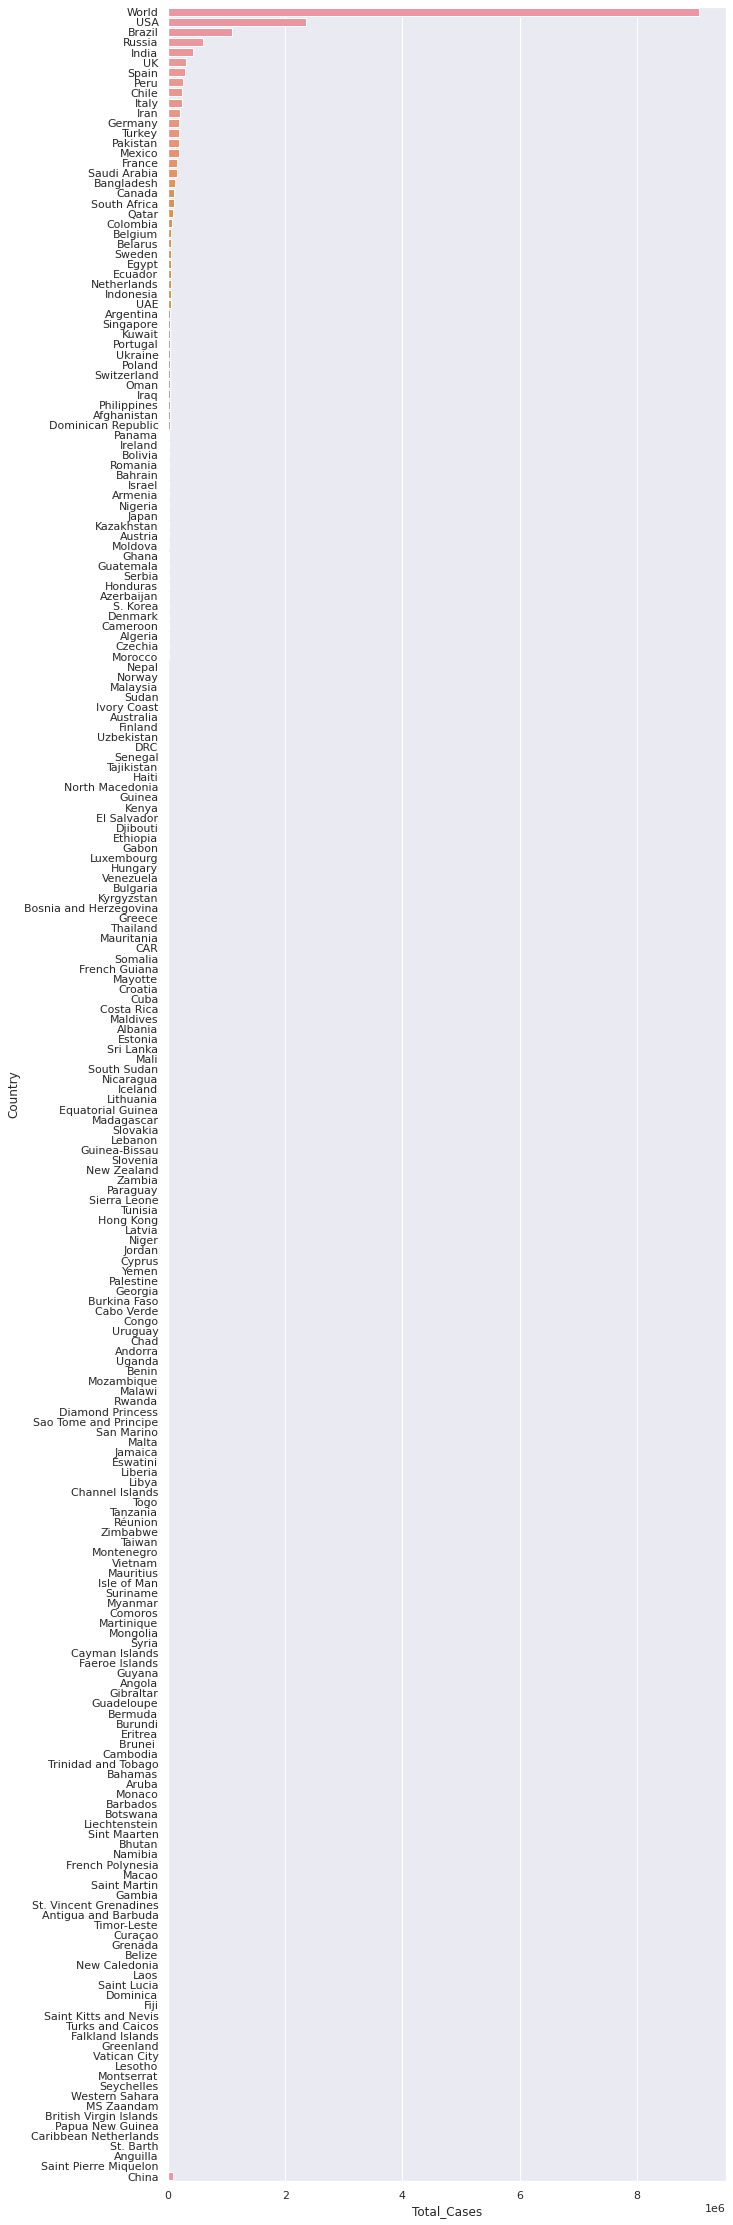

In [ ]:
plt.figure(figsize = (10,40))
sns.barplot(x=data['Total_Cases'], y = data['Country'] )
plt.xlabel('Total_Cases')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

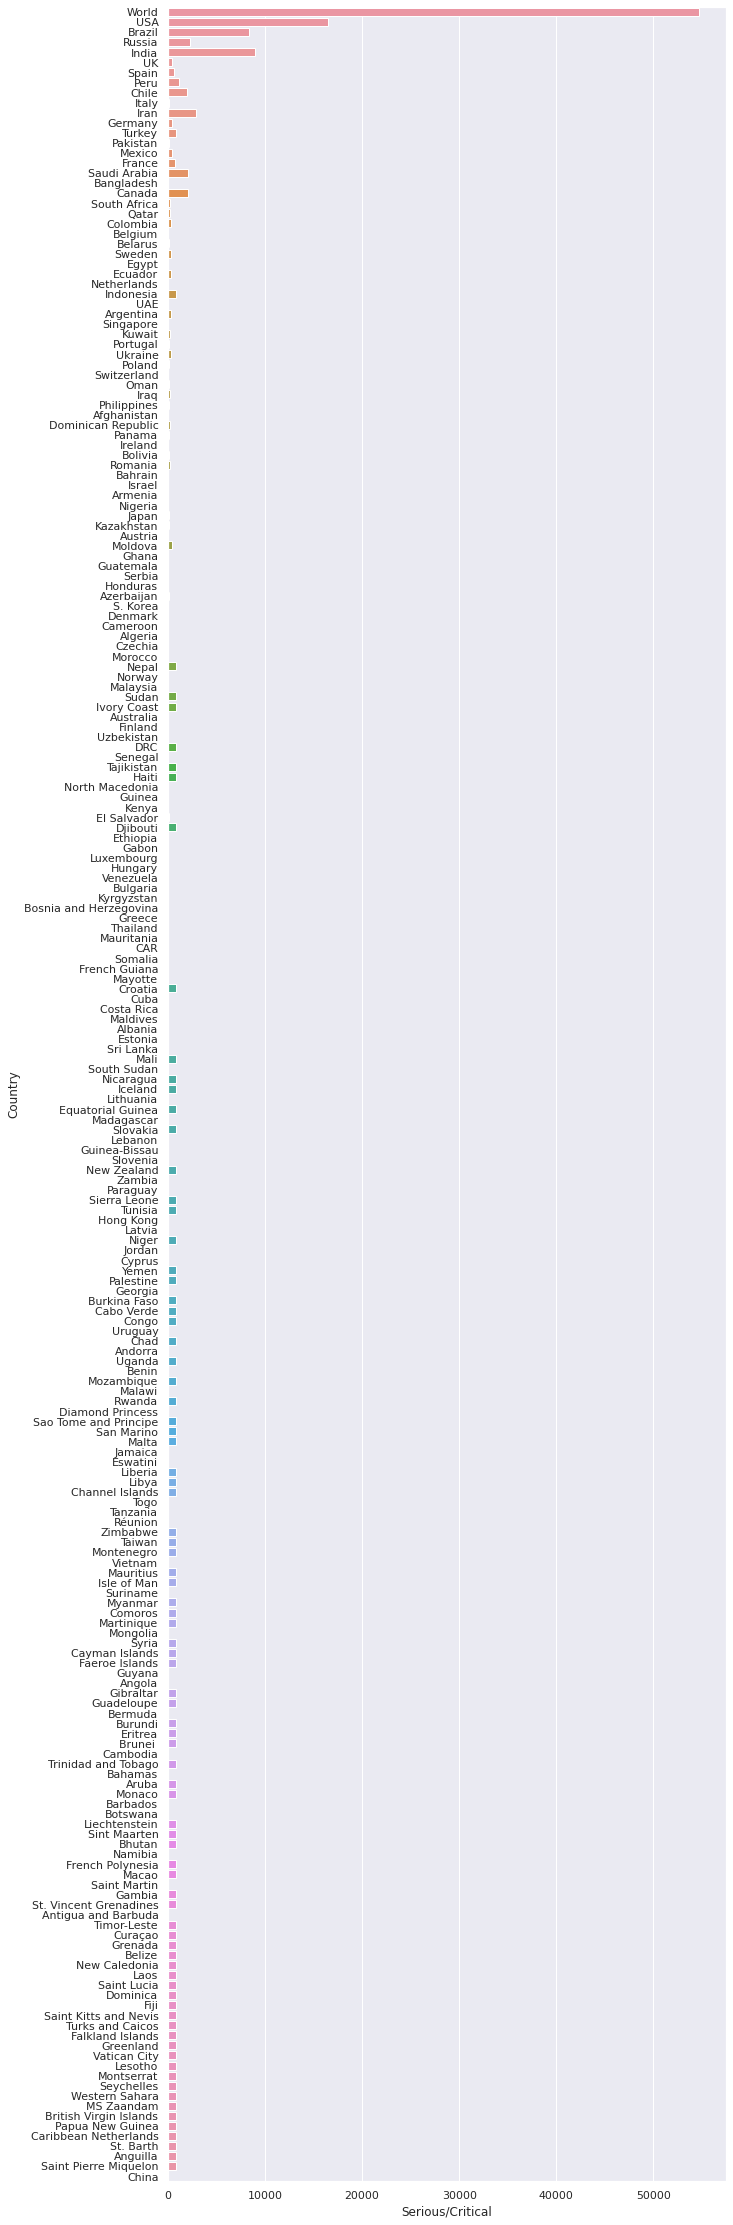

In [ ]:
plt.figure(figsize = (10,40))
sns.barplot(x=data['Serious/Critical'], y = data['Country'] )
plt.xlabel('Serious/Critical')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

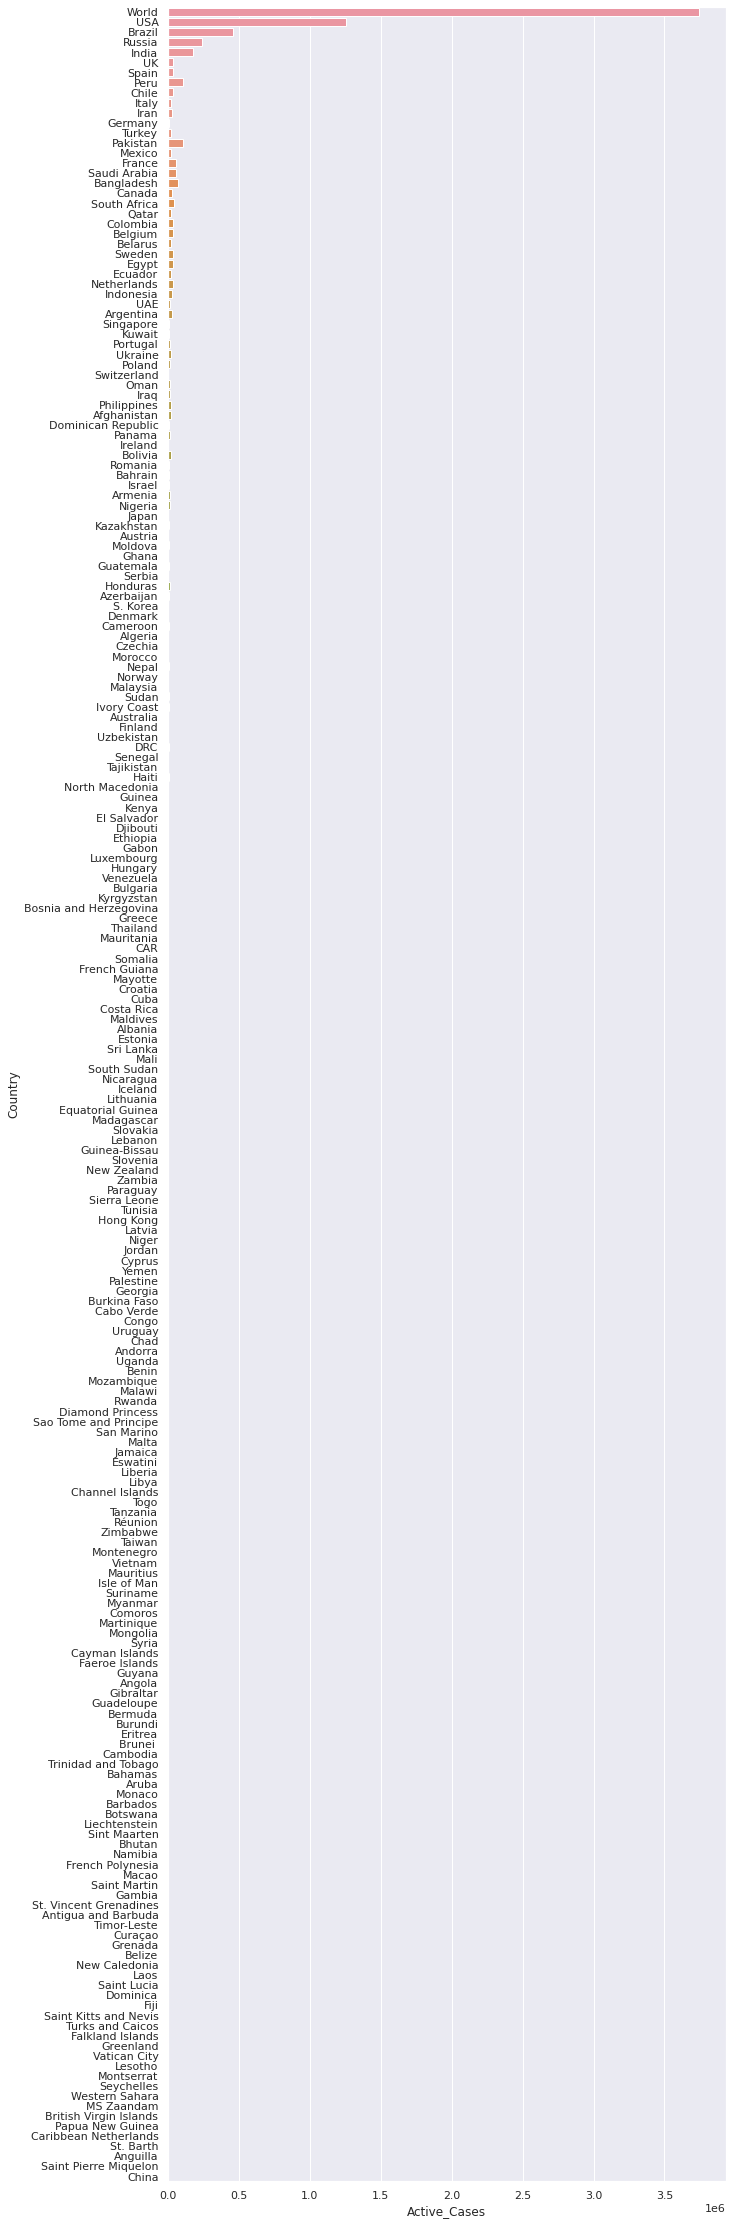

In [ ]:
plt.figure(figsize = (10,40))
sns.barplot(x=data['Active_Cases'], y = data['Country'] )
plt.xlabel('Active_Cases')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

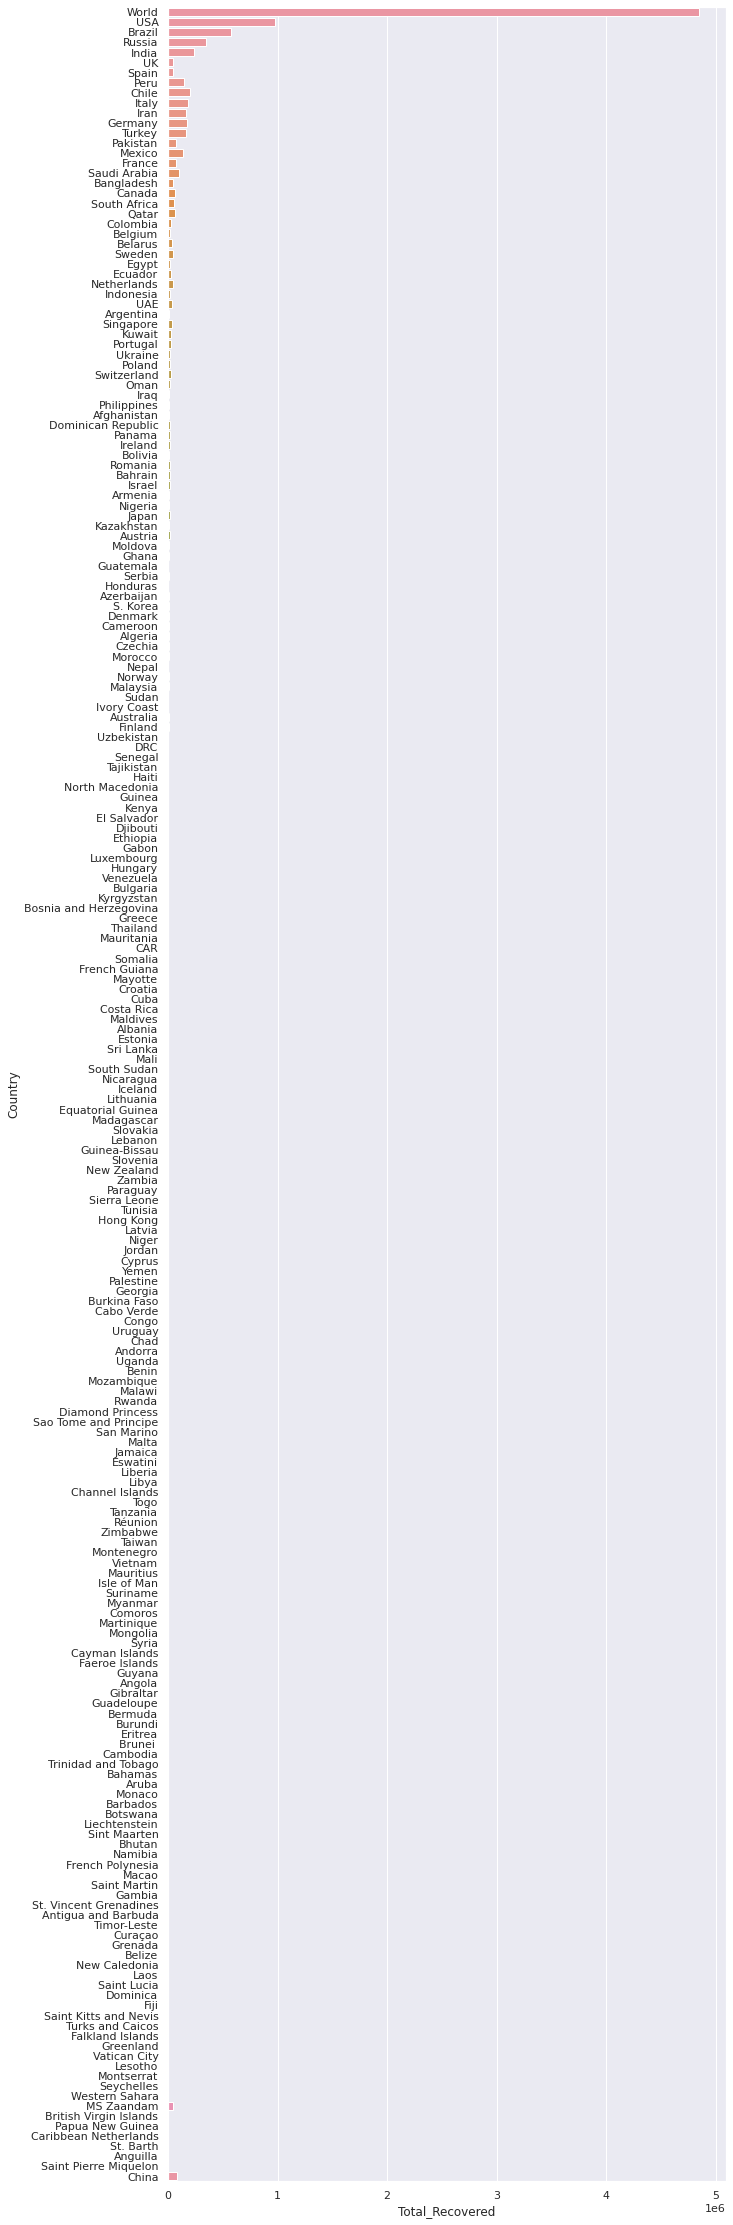

In [ ]:
plt.figure(figsize = (10,40))
sns.barplot(x=data['Total_Recovered'], y = data['Country'])
plt.xlabel('Total_Recovered')
plt.ylabel('Country')

In [278]:
#The Total_Deaths column has numeric values inputed has strings and it contains empty string, replacing with a zero string
data['Total_Deaths'] = data['Total_Deaths'].str.replace(' ','0')

In [279]:
#Removing commas from numbers in the column
data['Total_Deaths'] = data['Total_Deaths'].str.replace(',', '')

In [280]:
#Changing the data_type of the column to float
data['Total_Deaths'] = data['Total_Deaths'].astype(float)

In [281]:
#Round down
data['Total_Deaths'] = data['Total_Deaths'].apply(np.floor)

In [283]:
#Changing the value of world's total death to zero
data.at[0, 'Total_Deaths'] = 0

In [284]:
#Summing up total deaths in all the countries
T = data['Total_Deaths'].sum()

In [285]:
#Changing the value of world's total death to the sum of total deaths in all countries
data.at[0, 'Total_Deaths'] = T

Text(0, 0.5, 'Country')

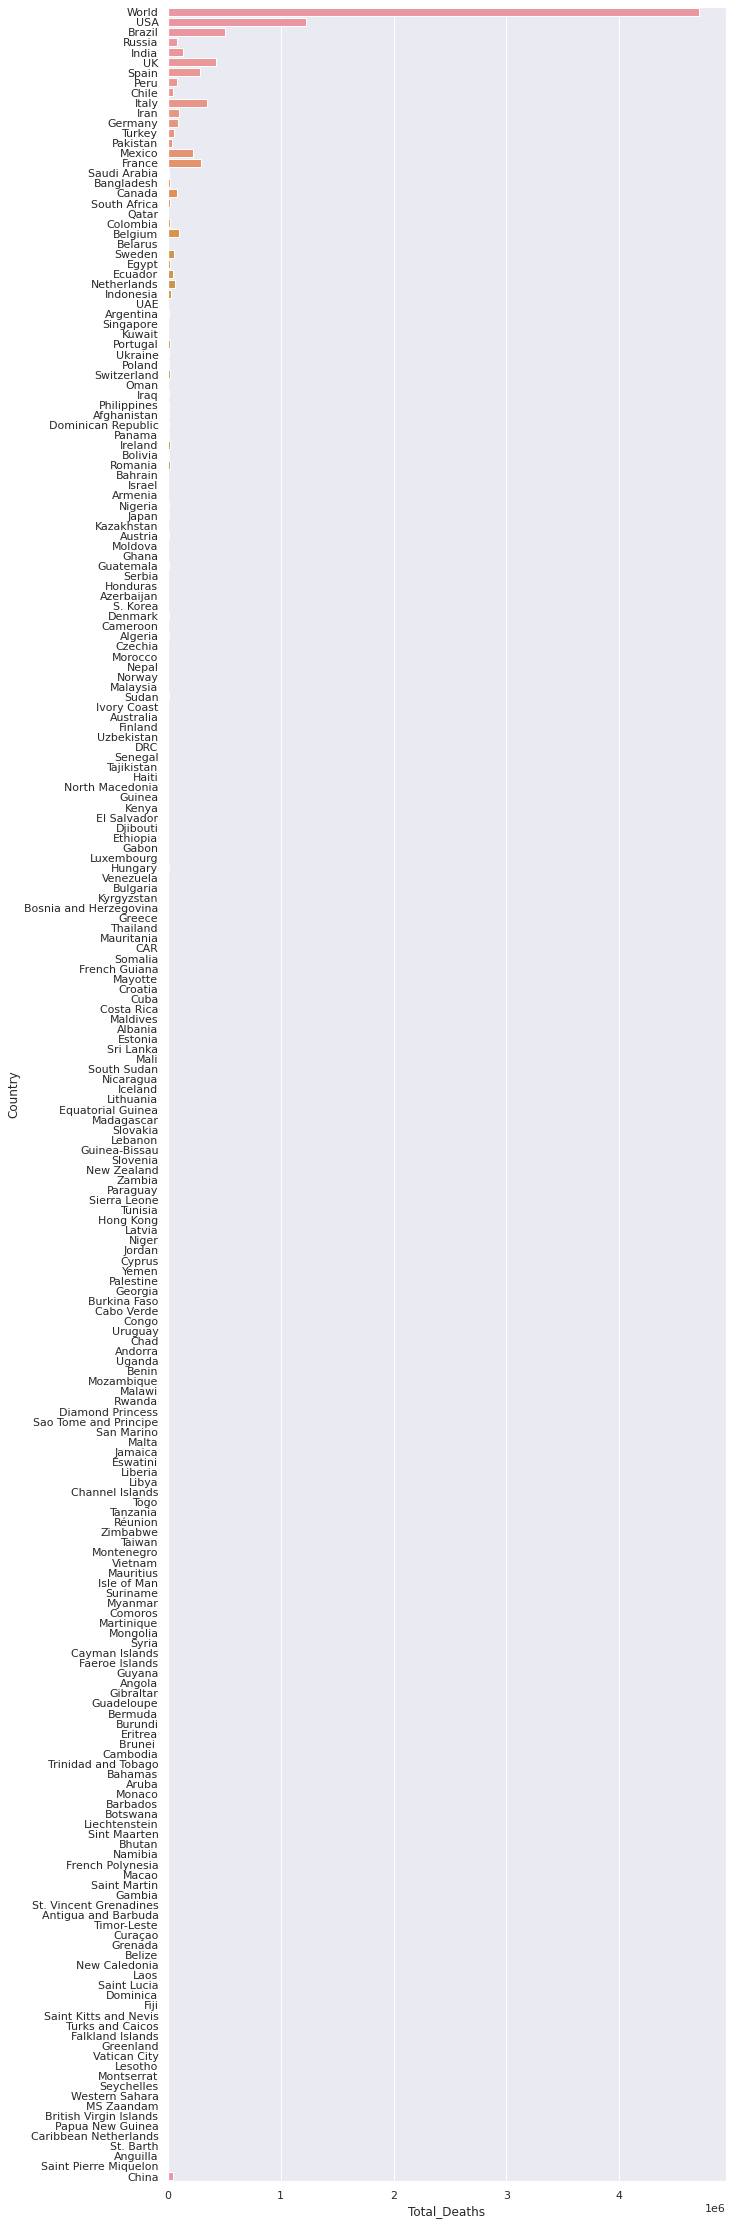

In [286]:
plt.figure(figsize = (10,40))
sns.barplot(x = data['Total_Deaths'], y = data['Country'])
plt.xlabel('Total_Deaths')
plt.ylabel('Country')

In [256]:
#Removing commas from the column
data['Total_Tests'] = data['Total_Tests'].str.replace(',', '')

In [257]:
data['Total_Tests'] = data['Total_Tests'].astype(float)

In [258]:
data['Total_Tests'] = data['Total_Tests'].apply(np.floor)

In [259]:
#Summing up total tests in all the countries
T = data['Total_Tests'].sum()

In [260]:
#Replacing world's total test with the sum of tests done in all countries
data.at[0, 'Total_Tests'] = T

Text(0, 0.5, 'Country')

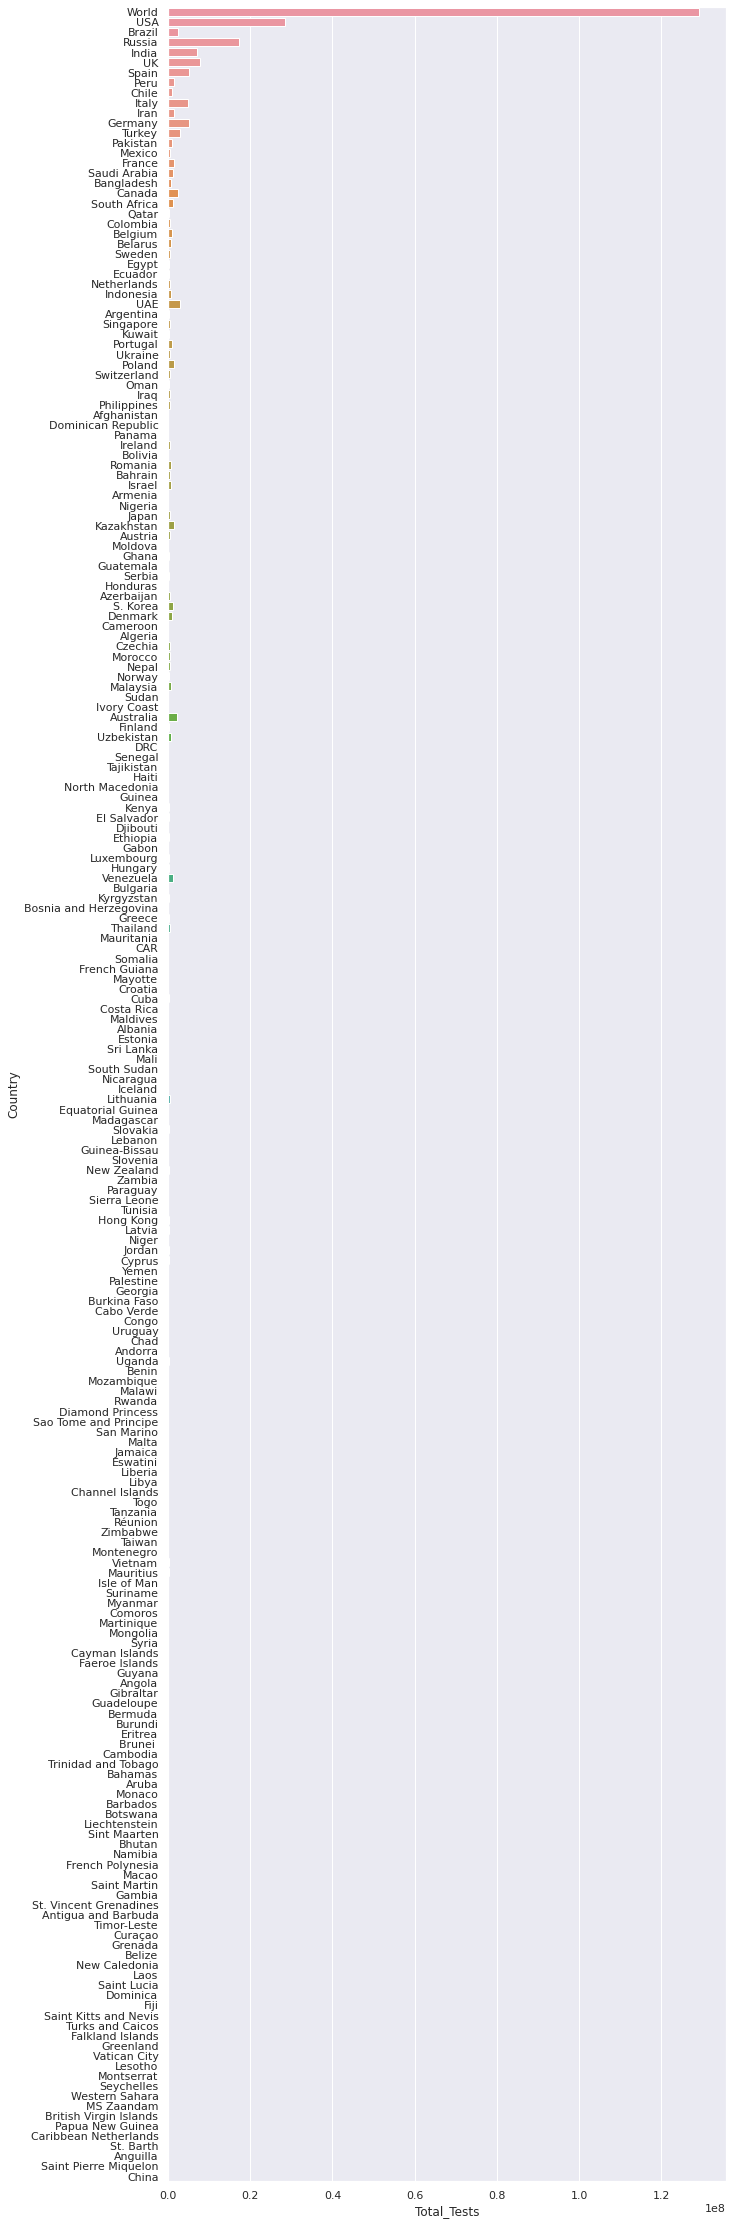

In [261]:
plt.figure(figsize = (10,40))
sns.barplot(x = data['Total_Tests'], y = data['Country'])
plt.xlabel('Total_Tests')
plt.ylabel('Country')